In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [2]:
# Define corpus
# משפט קצר לשם דוגמא
corpus = "Hello world. This is a meta text corpus to demonstate text prediction. Text prediction models are meta."
corpus = "לא לפנות אליי לא לדבר אליי אל תבוא אליי אל תתקשר אליי איזה כיף איתי ואוו חוויה ממש ממליצה לך"
corpus = "The snow glows white on the mountain tonight Not a footprint to be seen A kingdom of isolation And it looks like I'm the queen The wind is howling like this swirling storm inside Couldn't keep it in, heaven knows I tried Don't let them in, don't let them see Be the good girl you always have to be Conceal, don't feel, don't let them know Well, now they know"
# Initialize the tokenizer and fit the corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus]) # Passing in as a list

corpus

"The snow glows white on the mountain tonight Not a footprint to be seen A kingdom of isolation And it looks like I'm the queen The wind is howling like this swirling storm inside Couldn't keep it in, heaven knows I tried Don't let them in, don't let them see Be the good girl you always have to be Conceal, don't feel, don't let them know Well, now they know"

In [3]:
# Convert the corpus into a sequence of numbers
sequence = tokenizer.texts_to_sequences([corpus])[0]
# בגלל שזו פונקציה שמחזירה רשימה אנחנו לוקחים רק איבר אחד
print(sequence)

[1, 12, 13, 14, 15, 1, 16, 17, 18, 6, 19, 7, 3, 20, 6, 21, 22, 23, 24, 8, 25, 9, 26, 1, 27, 1, 28, 29, 30, 9, 31, 32, 33, 34, 35, 36, 8, 10, 37, 38, 39, 40, 2, 4, 5, 10, 2, 4, 5, 41, 3, 1, 42, 43, 44, 45, 46, 7, 3, 47, 2, 48, 2, 4, 5, 11, 49, 50, 51, 11]


In [ ]:
#Generate and Print N-gram Sequences

input_sequences = []

lines = corpus.split('\n')

for line in lines:
  sequence = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(sequence)):
    n_gram_sequence = sequence[:i+1]
    input_sequences.append(n_gram_sequence)

#input_sequences[:5]#some
input_sequences #all

In [5]:
# Padding Sequence and Creating X and y from the Padded Sequence
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len
#len(corpus) #?

70

In [6]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences[:10])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12 13]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12 13 14]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12 13 14 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [7]:
# חלוקה לפיצ'רים ומטרות
Xs = input_sequences[:, :-1]

labels = input_sequences[:, -1]

for i in range(5):
  print("X:", Xs[i], "label:", labels[i])

X: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] label: 12
X: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12] label: 13
X: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12 13] label: 14
X: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12 13 14] label: 15
X: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 

In [8]:
# Tokenized Word Index
tokenizer.word_index

total_words = len(tokenizer.word_index) + 1
#ohe
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
total_words

52

In [10]:
np.set_printoptions(linewidth =120)
Xs

array([[ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  1, 12],
       [ 0,  0,  0, ...,  1, 12, 13],
       ...,
       [ 0,  0,  1, ...,  5, 11, 49],
       [ 0,  1, 12, ..., 11, 49, 50],
       [ 1, 12, 13, ..., 49, 50, 51]], dtype=int32)

In [11]:
labels

array([12, 13, 14, 15,  1, 16, 17, 18,  6, 19,  7,  3, 20,  6, 21, 22, 23, 24,  8, 25,  9, 26,  1, 27,  1, 28, 29, 30,
        9, 31, 32, 33, 34, 35, 36,  8, 10, 37, 38, 39, 40,  2,  4,  5, 10,  2,  4,  5, 41,  3,  1, 42, 43, 44, 45, 46,
        7,  3, 47,  2, 48,  2,  4,  5, 11, 49, 50, 51, 11], dtype=int32)

In [12]:
ys #ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
ys[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
total_words

52

In [15]:
# Build model
model = Sequential([
    Embedding(total_words, 64, input_length=max_sequence_len - 1),
    LSTM(20),
    Dense(total_words, activation='softmax')
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
# Train model
history = model.fit(Xs, ys, epochs=150, verbose=1)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0301 - loss: 3.9501
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0870 - loss: 3.9433
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1054 - loss: 3.9388
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1244 - loss: 3.9349
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1506 - loss: 3.9306
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1768 - loss: 3.9254
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1807 - loss: 3.9190
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1539 - loss: 3.9151
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1506 - loss: 3.9082
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1389 - loss: 3.9020
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1495 - loss: 3.8931
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1539 - loss: 3.8824
E

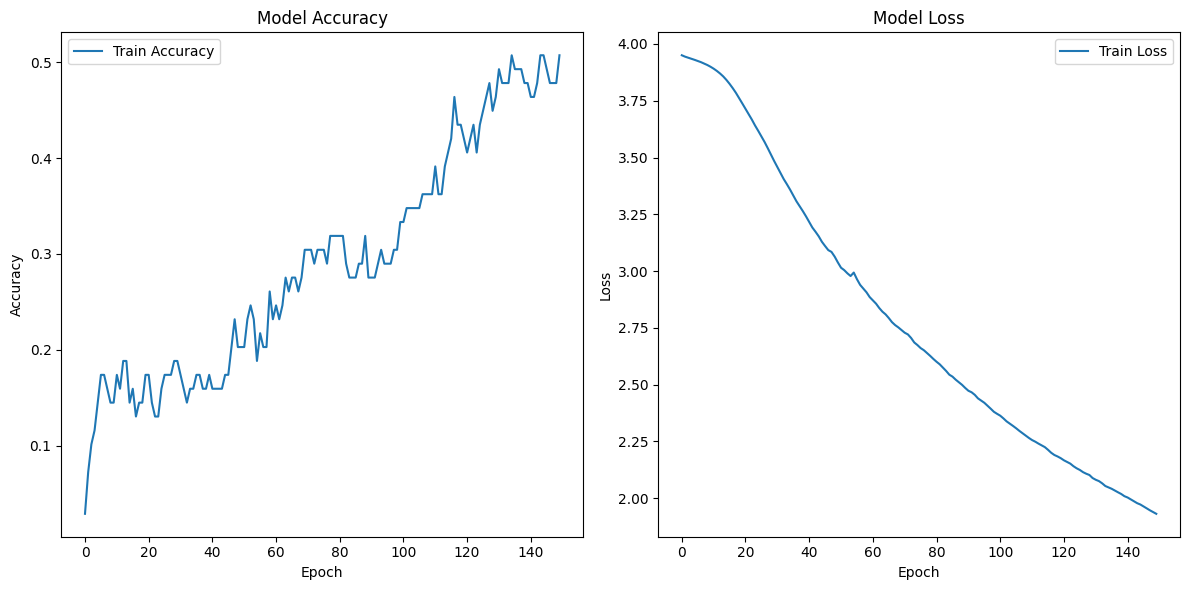

In [16]:
# Plot accuracy and loss curves
def plot_training_history(history):
    # Train accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Train loss
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = loss
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

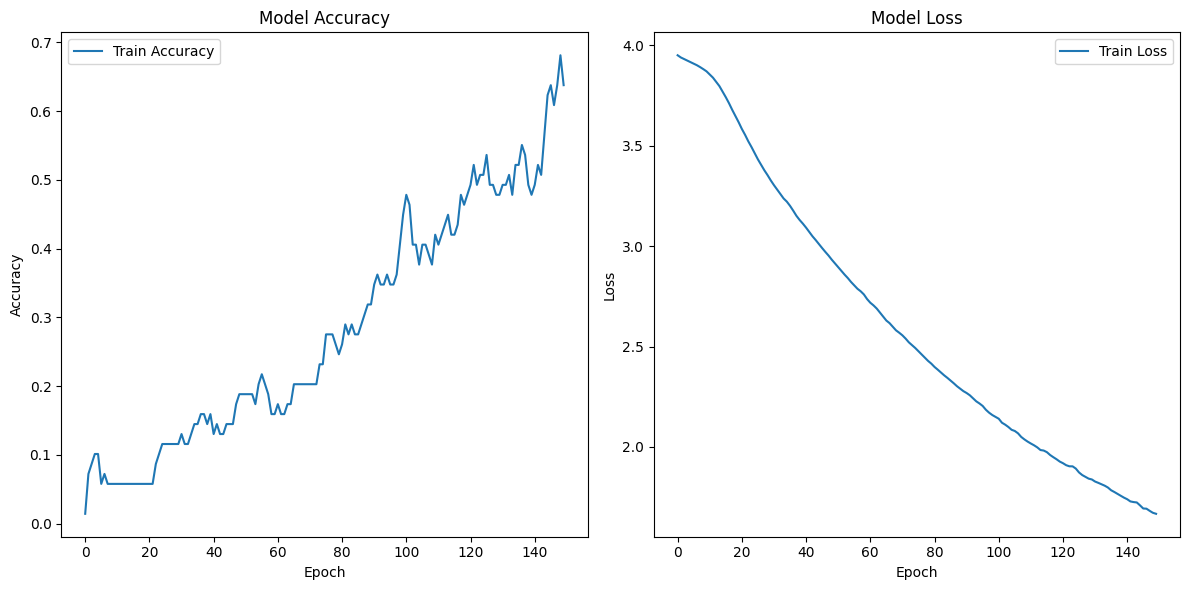

In [17]:
# Add Bidirectional(LSTM) and Plot Curves

# Build model
model_bidirectional = Sequential([
    Embedding(total_words, 64),
    Bidirectional(LSTM(20)),
    Dense(total_words, activation='softmax')
])

# Compile model
model_bidirectional.compile(loss='categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])


# Train model
bidirectional_history = model_bidirectional.fit(Xs,
                                                ys,
                                                epochs=150, verbose =0)


plot_training_history(bidirectional_history)

In [21]:
# Create a Text Prediction 🔮 Sequence Model
seed_text = "let it"
next_words = 30 # אורך המשפט הרצוי

for _ in range(next_words): # Loop until next_words is reached
  # מטקנים את המשפט הראשוני
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

  token_list = pad_sequences([token_list], maxlen=max_sequence_len -1, padding='pre')

  probabilities = model.predict(token_list, verbose=0)

  predicted_index = np.argmax(probabilities, axis=-1)[0]

  if predicted_index != 0:
    output_word = tokenizer.index_word[predicted_index]
    seed_text += " " + output_word


seed_text

'let it glows glows white on mountain not not a footprint a a kingdom kingdom of and and it looks like like like wind like like like this swirling swirling swirling storm'

In [34]:
seed_text = "snow"
next_words = 5

for _ in range(next_words):  # רץ 5 פעמים כדי לחזות 5 מילים נוספות
    token_list = tokenizer.texts_to_sequences([seed_text])[0]  # הופך את המשפט לרשימת מספרים
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding="pre")  # ריפוד לרצף קבוע

    probabilities = model.predict(token_list, verbose=0)[0]  # תחזית ההסתברויות לכל מילה במילון

    predicted_index = np.random.choice(len(probabilities), p=probabilities)  # בחירת מילה על בסיס הסתברויות

    if predicted_index != 0:  # מוודאים שלא נבחר טוקן ריק
        seed_text += " " + tokenizer.index_word[predicted_index]  # מוסיפים את המילה למשפט

print("Generated text:", seed_text)


Generated text: snow white to heaven snow glows
